In [1]:
import datetime
import torchaudio
from data import Category, MyDataset
import analysis as an
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
base_dir = '\\\\10.166.168.123\\典型城市声纹数据库-标签过'
category_list = ['自然噪声', '社会噪声', '建筑施工噪声', '工业噪声', '交通噪声']

In [3]:
import wandb
wandb.login()

wandb.init(
    project="NoiseData.Analysys",
    name=datetime.datetime.now().strftime("%Y-%m-%d"),
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: reviy (esil). Use `wandb login --relogin` to force relogin


In [4]:
cols = 'file audio sr Leq waveform spectrogram mel_spectrogram frequency_spectrum'.split(" ")
table = wandb.Table(columns=cols)

c:\Users\Vi\Desktop\HYCX.NoiseData.Fastapi\analysis.py:42: RuntimeWarning: divide by zero encountered in log10
  a_weight = 2.00 + 20 * np.log10(ra)


AttributeError: 'tuple' object has no attribute 'savefig'

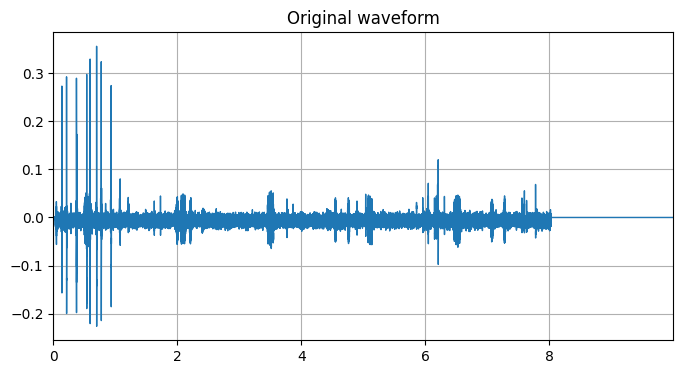

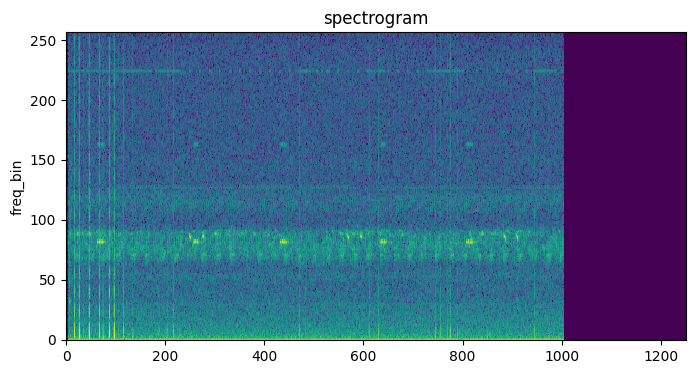

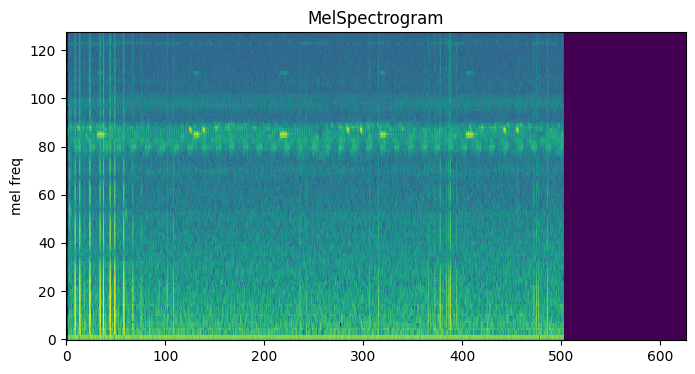

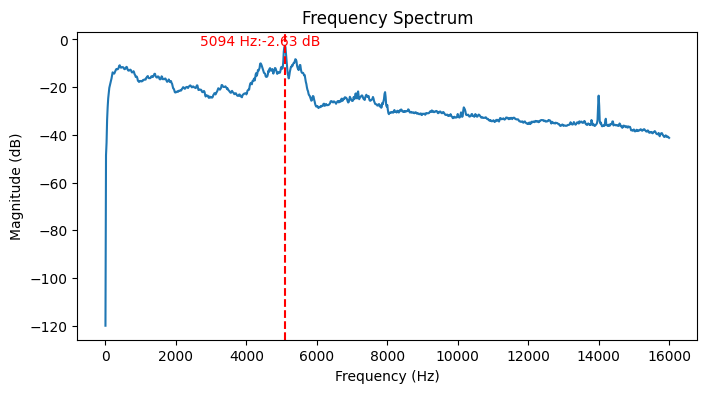

In [5]:
spectrogram = an.get_spectrogram()
for cname in category_list:
    c = Category.from_selections(cname)
    d = MyDataset(c,base_dir)
    for i in range(len(c)):
        file_path = d[i*1200][0]
        signal, sr = torchaudio.load(file_path) # load signal and sample rate
        mel_spectrogram = an.get_mel_spectrogram(sr=sr)
        
        waveform_fig = an.plot_waveform(signal, sr, title="Original waveform")
        # plot spectrogram
        spec = spectrogram(signal)
        spect_fig = an.plot_spectrogram(spec[0], title="spectrogram")
        
        # plot mel_spectrogram
        melspec = mel_spectrogram(signal)
        mel_fig = an.plot_spectrogram(melspec[0], title="MelSpectrogram", ylabel="mel freq")
        
        # plot frequecy spectrum
        freq_fig, Leq = an.plot_frequency_spectrogram(signal, sr)
        
        # file audio sr Leq waveform spectrogram mel_spectrogram frequency_spectrum
        table.add_data(
            file_path.split("\\")[-1],
            wandb.Audio(signal.mean(axis=0).flatten().numpy(), sample_rate=sr),
            sr,
            Leq,
            an.plt2wandbImage(waveform_fig),
            an.plt2wandbImage(spect_fig),
            an.plt2wandbImage(mel_fig),
            an.plt2wandbImage(freq_fig)
        )
        wandb.log({cname: table})
wandb.finish()